# Introduction to Antiderivatives

An antiderivative of a function is another function whose derivative is the original function. In other words, if $ F(x) $ is an antiderivative of $ f(x) $, then $ F'(x) = f(x) $. Antiderivatives are also known as indefinite integrals and are fundamental in calculus for solving problems involving areas, motion, and many other applications.

This notebook provides an interactive exploration of antiderivatives (also known as indefinite integrals) using the SymPy library in Python. We will cover the following:

1. **Example of an Antiderivative?**  

2. **Constant of Integration**

4. **Particular Solution**

3. **Practice**


By the end of this notebook, you should have a solid understanding of antiderivatives and how to work with them using SymPy. Let's get started!

But first we have to import the necessary libraries

In [2]:
from IPython.display import display, Math, Markdown
import sympy as sp
from sympy import latex
import matplotlib.pyplot as plt
import numpy as np

## Example of an Antiderivative

To find the antiderivative of a function, we use SymPy's `integrate` function. We will consider the function $ f:x \mapsto x^2 + 2x + 1 $. Using SymPy, we can find its antiderivative as follows:

This code snippet demonstrates how to use SymPy to find the antiderivative of a given function. We will use Matplotlib to plot the functions. 

Feel free to modify the function `f` but be careful to modify `x_values` according to the domain of definition.

One antiderivative of $f:x\mapsto x^{2} + 2 x + 1$ is $F:x \mapsto \frac{x^{3}}{3} + x^{2} + x$

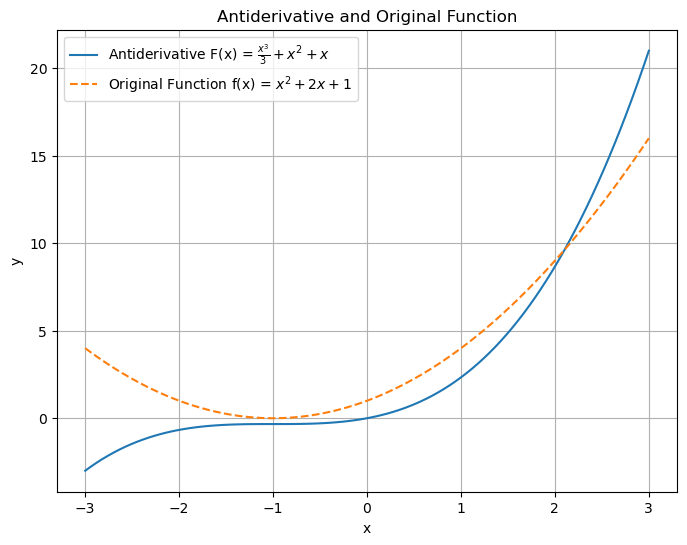

In [3]:

# Define the symbolic variable
x = sp.Symbol('x')

# Define a function for which we want to find the antiderivative
f = x**2 + 2*x + 1  # Example function: x^2 + 2x + 1

# Calculate the antiderivative
F = sp.integrate(f, x)
display(Markdown(f"One antiderivative of $f:x\\mapsto {latex(f)}$ is $F:x \\mapsto {latex(F)}$"))

# Evaluate the antiderivative at specific points
x_values = np.linspace(-3, 3, 100)  # Create a range of x values to evaluate the function
F_values = sp.lambdify(x, F, modules=['numpy'])  # Convert the symbolic expression to a numerical function
y_values = F_values(x_values)


# Evaluate the original function at the same points
f_values = sp.lambdify(x, f, modules=['numpy'])
y_values_f = f_values(x_values)


# Plotting
plt.figure(figsize=(8, 6))

# Plot the antiderivative
plt.plot(x_values, y_values, label=f'Antiderivative F(x) = ${latex(F)}$')

# Plot the original function
plt.plot(x_values, y_values_f, label=f'Original Function f(x) = ${latex(f)}$', linestyle='--')


# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Antiderivative and Original Function')
plt.legend()
plt.grid(True)


# Show the plot
plt.show()


## Constant of Integration

When we find the antiderivative of a function, we introduce a constant of integration, often denoted by "C". This constant represents the fact that there is a family of functions that have the same derivative. For example, if we integrate the function $f(x) = x^2 + 2x + 1$, we get $F(x) = \frac{x^3}{3} + x^2 + x + C$, $C\in \mathbb{R}$


In [4]:
%matplotlib inline
from ipywidgets import interact, IntSlider

# You can change f below
f = x*sp.log(x)
F = sp.integrate(f, x)
display(Markdown(f"One antiderivative of $f:x\\mapsto {latex(f)}$ is: $F:x\\mapsto {latex(F)}$"))
x_values = np.linspace(1, 10, 100)


print("Interactive plot with constant of integration")
print("Change the constant of integration to see how it affects the antiderivative")

# Interactive plot with constant of integration
@interact(C=IntSlider(min=-10, max=10, step=1, value=0, description='C:'))
def plot_antiderivative(C):
    # Calculate the indefinite integral (antiderivative) with the constant C
    F_with_C = F + C

    # Evaluate the antiderivative at specific points with the constant C
    F_values_with_C = sp.lambdify(x, F_with_C, modules=['numpy'])
    y_values_with_C = F_values_with_C(x_values)

    # Plotting (same as before, but with the updated antiderivative)
    plt.figure(figsize=(8, 6))

    plt.plot(x_values, y_values_with_C, label=f'Antiderivative F(x) = ${latex(F_with_C)}$')
    plt.plot(x_values, y_values_f, label=f'Original Function f(x) = ${latex(f)}$', linestyle='--')

    # Set axis limits
    plt.xlim([x_values.min(), x_values.max()])  # Set x-axis limits
    plt.ylim([y_values_f.min() - 5, y_values_f.max() + 5])  # Set y-axis limits with some buffer

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Antiderivative and Original Function')
    plt.legend()
    plt.grid(True)
    plt.show()

One antiderivative of $f:x\mapsto x \log{\left(x \right)}$ is: $F:x\mapsto \frac{x^{2} \log{\left(x \right)}}{2} - \frac{x^{2}}{4}$

Interactive plot with constant of integration
Change the constant of integration to see how it affects the antiderivative


interactive(children=(IntSlider(value=0, description='C:', max=10, min=-10), Output()), _dom_classes=('widget-…

## Particular Solutions of Differential Equations

In the previous sections, we explored antiderivatives and indefinite integrals. When we find the antiderivative of a function, we introduce a constant of integration, often denoted by "C". This constant represents the fact that there is a family of functions that have the same derivative. For example, if we integrate the function  $f(x) = 2x$, we get $F(x) = x^2 + C$.

This general solution, $F(x) = x^2 + C$, represents infinitely many antiderivatives, each with a different value of C. To find a *particular solution*, we need additional information. This information usually comes in the form of an initial condition.

**Initial Condition:** An initial condition specifies the value of the function (or its derivative) at a particular point. For example, we might be given the condition $F(0) = 3$. This means that the antiderivative we are looking for must pass through the point (0, 3).

**Finding the Particular Solution:** To find the particular solution, we substitute the initial condition into the general solution and solve for the constant of integration (C).

In our example, using the initial condition $F(0) = 3$ gives $C = 3$

The antiderivative of $f:x\mapsto \sqrt{x + 1}$ is $F:x \mapsto \frac{2 \left(x + 1\right)^{\frac{3}{2}}}{3}$

The constant of integration is: $C = 2 - 4 \sqrt{6}$

The antiderivative with the constant of integration is: $F:x \mapsto \frac{2 \left(x + 1\right)^{\frac{3}{2}}}{3} - 4 \sqrt{6} + 2$

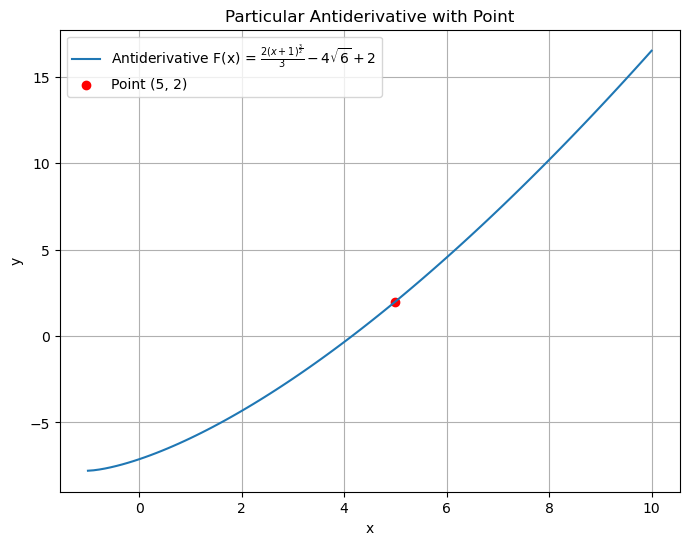

In [7]:

# Define symbolic variable
x = sp.Symbol('x')

# Define the function and antiderivative
f = sp.sqrt(x+1)
F = sp.integrate(f, x)

display(Markdown(f"The antiderivative of $f:x\\mapsto {latex(f)}$ is $F:x \\mapsto {latex(F)}$"))

# Define the point (x0, y0) at which we want to plot the antiderivative
x0 = 5
y0 = 2

# Calculate the constant of integration
C = y0 - F.subs(x, x0)

display(Markdown(f"The constant of integration is: $C = {latex(C)}$"))
display(Markdown(f"The antiderivative with the constant of integration is: $F:x \\mapsto {latex(F + C)}$"))

# Plot the Antiderivative with point (x0,y0)
F = F + C

x_values = np.linspace(-1, 10, 100)
y_values = sp.lambdify(x, F, modules=['numpy'])(x_values)


plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=f'Antiderivative F(x) = ${latex(F)}$')
plt.scatter(x0, y0, color='red', label=f'Point ({x0}, {y0})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Particular Antiderivative with Point')
plt.legend()
plt.grid(True)
plt.show()



## Practice: Finding Particular Antiderivatives

In this practice exercise, you will use SymPy to find the particular antiderivative of four given functions at specified points. Follow the steps below to complete the exercise:

1. **Define the symbolic variable**: Use `sp.Symbol('x')` to define the variable `x`.

2. **Define the functions**: Define the following functions using SymPy:
    - $ f_1:x \mapsto 2x + 1 $
    - $ f_2:x \mapsto\sqrt{x + 1} $
    - $ f_3:x \mapsto \cos(x) $
    - $ f_4:x \mapsto (x + 4)^{-2} $

3. **Find the antiderivatives**: Use `sp.integrate(f, x)` to find the antiderivative of each function.

4. **Evaluate the constant of integration**: Use the given points to find the constant of integration $ C $ for each function:
    - For $ f_1 $, find the antiderivative at $ x_0 = 0 $ and $ y_0 = -28 $
    - For $ f_2 $, find the antiderivative at $ x_0 = 5 $ and $ y_0 = 2 $
    - For $ f_3 $, find the antiderivative at $ x_0 = 5 $ and $ y_0 = 2 $
    - For $ f_4 $, find the antiderivative at $ x_0 = 5 $ and $ y_0 = 2 $

5. **Display the results**: Use `display(Markdown(...))` to display the antiderivative with the constant of integration for each function.

6. **Verify the results**: Use `f.subs(x, x0)` to verify that the antiderivative satisfies the initial condition.

After completing the steps above, you will have found the particular antiderivatives of the given functions at the specified points.


In [ ]:
# Your Code Here